In [432]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-dataset/heart.csv


In [433]:
# Major Libraries
import scipy
import bottleneck 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Mining / Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# Supervised Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as XGB

from collections import Counter
import yellowbrick as yb
from yellowbrick.classifier import ClassificationReport
from matplotlib import rcParams

%matplotlib inline

In [434]:
heart = pd.read_csv('../input/heart-disease-dataset/heart.csv')

In [435]:
type(heart)

pandas.core.frame.DataFrame

In [436]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [437]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [438]:
heart.shape

(1025, 14)

In [439]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [440]:
heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [441]:
heart.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [442]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [443]:
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

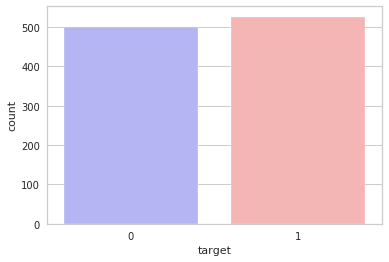

In [444]:
#  Exploratory Analysis
sns.countplot(x="target", data=heart, palette="bwr")
plt.show()

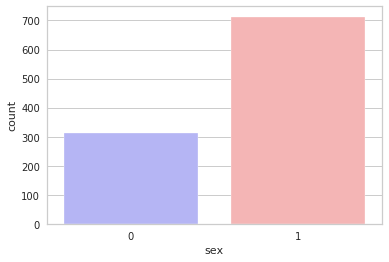

In [445]:
sns.countplot(data=heart, x="sex", palette="bwr")

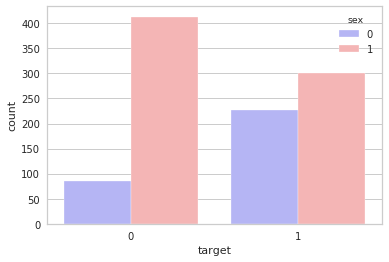

In [446]:
sns.countplot(data=heart, x="target", hue="sex", palette="bwr")

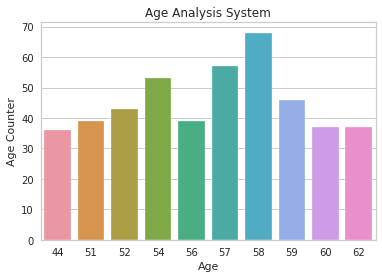

In [447]:
sns.barplot(x=heart.age.value_counts()[:10].index,y=heart.age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age Counter')
plt.title('Age Analysis System')
plt.show()

Text(0.5, 1.0, 'Most Common Ages of Heart Patients')

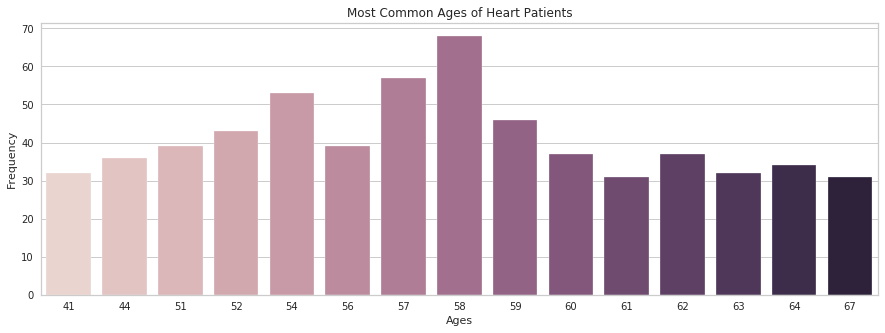

In [448]:
# Age range more likely being a heart patient 
age_list= list(heart.age)
# Using 'Counter' Method
age_count= Counter(age_list)
most_common_age= age_count.most_common(15)
x,y = zip(*most_common_age)
x,y = list(x), list(y)

#  Visualization
plt.figure(figsize=(15,5))
sns.barplot(x=x, y=y, palette= sns.cubehelix_palette(len(x)))
plt.ylabel('Frequency')
plt.xlabel('Ages')
plt.title('Most Common Ages of Heart Patients')

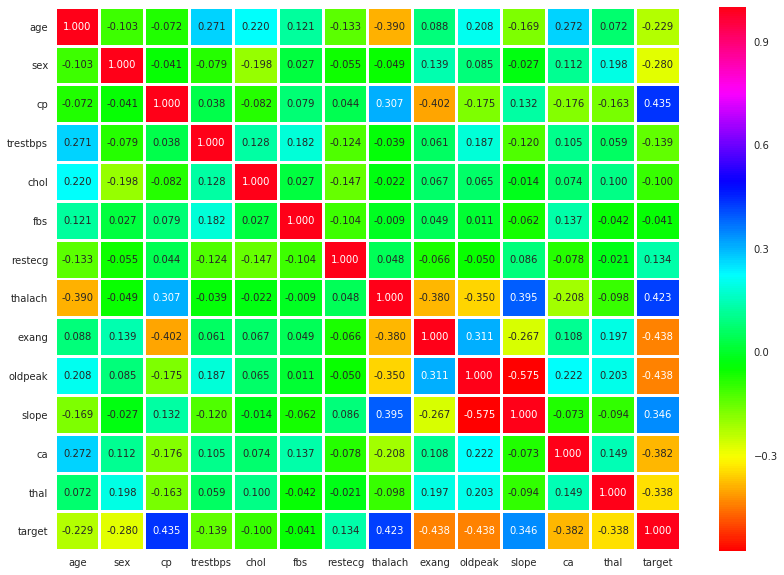

In [449]:
#  Correlation
plt.figure(figsize=(14,10))
sns.heatmap(heart.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

In [450]:
corr_matrix = heart.corr()
corr_matrix["target"].sort_values(ascending=False)

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64

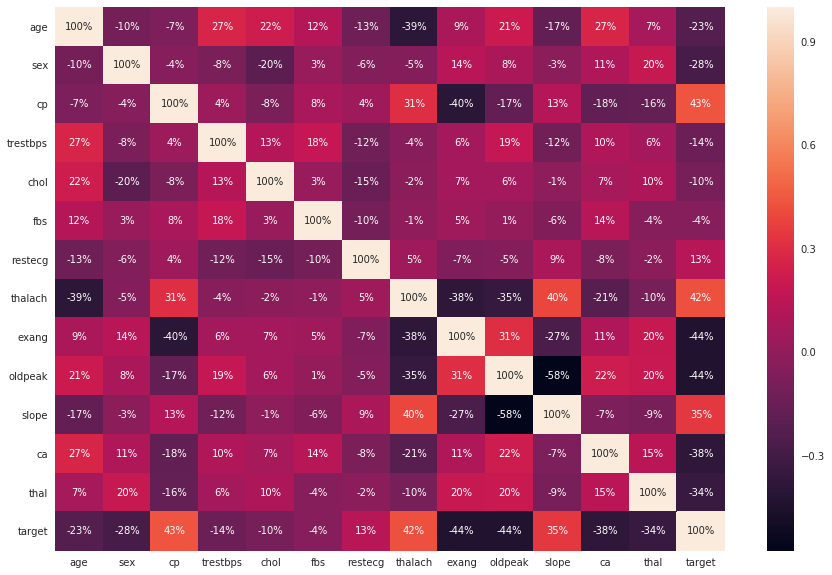

In [451]:
#  Visualizing the Correlation 
plt.figure(figsize=(15,10))
sns.heatmap(heart.iloc[:,0:15].corr(), annot=True,fmt=".0%")
plt.show()

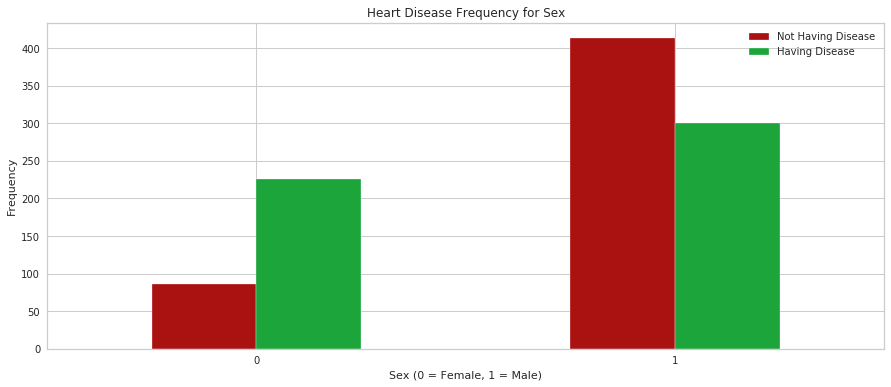

In [452]:
pd.crosstab(heart.sex,heart.target).plot(kind="bar",figsize=(15,6),color=['#AA1111', '#1CA53B'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Not Having Disease", "Having Disease"])
plt.ylabel('Frequency')
plt.show()

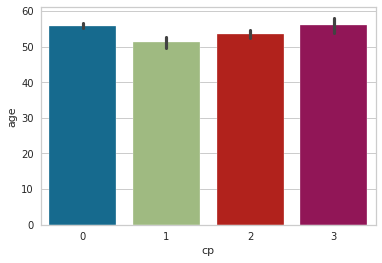

In [453]:
sns.barplot(x='cp',y='age',data=heart)
plt.show()

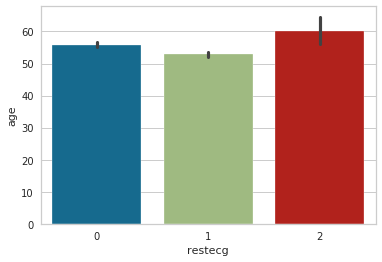

In [454]:
sns.barplot(x='restecg',y='age',data=heart)
plt.show()

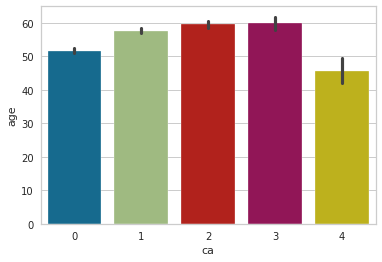

In [455]:
sns.barplot(x='ca',y='age',data=heart)
plt.show()

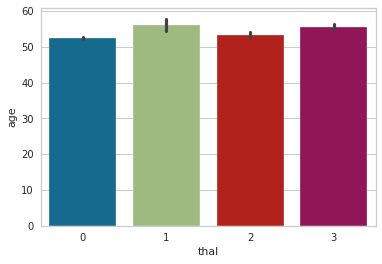

In [456]:
sns.barplot(x='thal',y='age',data=heart)
plt.show()

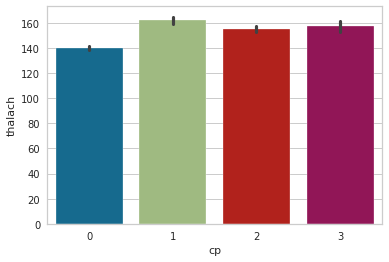

In [457]:
sns.barplot(x='cp',y='thalach',data=heart)
plt.show()

Text(0.5, 1.0, 'Target People According to Chest Pain Type')

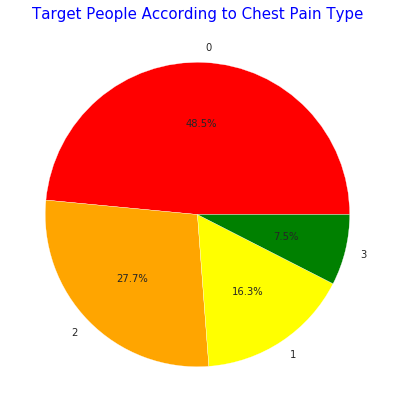

In [458]:
labels = heart.cp.value_counts().index
colors = ['red','orange','yellow','green']
explode = [0,0,0,0]
sizes = heart.cp.value_counts().values

# Visual cp
plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Target People According to Chest Pain Type',color = 'blue',fontsize = 15)

In [459]:
# Detection of Outliers

def detect_outliers(heart,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
# Iterating over Features(Columns)
    for col in features:
        # 1st Quartile (25%)
        Q1 = np.percentile(heart[col], 25)
        # 3rd Quartile (75%)
        Q3 = np.percentile(heart[col],75)
        # Interquartile Range (IQR)
        IQR = Q3 - Q1
        
        # Outlier Step
        outlier_step = 1.5 * IQR
        
        # Determining A List of Indices of Outliers for Feature col
        outlier_list_col = heart[(heart[col] < Q1 - outlier_step) | (heart[col] > Q3 + outlier_step )].index
        
        # Appending the Found Outlier Indices for col to the List of Outlier Indices 
        outlier_indices.extend(outlier_list_col)
        
    # Selecting Observations Containing More Than 2 Outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# Detecting Outliers 
Outliers_to_drop = detect_outliers(heart,2,['trestbps', 'chol','thalach'])

In [460]:
# Showing the Outliers Rows
heart.loc[Outliers_to_drop] 

#  Since the values of all the columns are in range, No outliers to drop

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [461]:
heart.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
565,53,0,0,138,234,0,0,160,0,0.0,2,0,2,1
332,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
484,65,1,0,110,248,0,0,158,0,0.6,2,2,1,0
814,62,1,1,128,208,1,0,140,0,0.0,2,0,2,1
355,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1


In [462]:
X = heart.drop(['target'], axis = 1)
y = heart.target.values

In [463]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [464]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [465]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [466]:
#  Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [467]:
accuracies = {}
Classifiers = list()

In [468]:
#  Classification Using Logistic Regression
LR = LogisticRegression(solver='lbfgs', C=0.1, random_state=0)
LR.fit(X_train,y_train)
y_pred_LR = LR.predict(X_test)
Classifiers.append(y_pred_LR)

acc = LR.score(X_test,y_test)*100
accuracies['Logistic Regression'] = acc
print("Test Accuracy of Logistic Regression Algorithm: {:.2f}%".format(acc))

Test Accuracy of Logistic Regression Algorithm: 79.02%


In [469]:
#  Classification Using SVM
SVM = SVC(random_state = 42)
SVM.fit(X_train, y_train)
y_pred_SVM = SVM.predict(X_test)
Classifiers.append(y_pred_SVM)

acc = SVM.score(X_test,y_test)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 88.78%


In [470]:
#  Classification Using KNN
KNN = KNeighborsClassifier(n_jobs=2, n_neighbors=22) 
KNN.fit(X_train, y_train)
y_pred_KNN = KNN.predict(X_test)
Classifiers.append(y_pred_KNN)

acc = KNN.score(X_test,y_test)*100
accuracies['KNN'] = acc
print("Test Accuracy of KNN Algorithm: {:.2f}%".format(acc))

Test Accuracy of KNN Algorithm: 82.93%


In [471]:
#  Classification Using Extra Trees Classifier 
ETC = ExtraTreesClassifier(max_depth=2, n_estimators=814, n_jobs=-1, random_state=253)
ETC.fit(X_train,y_train)
y_pred_ETC = ETC.predict(X_test)
Classifiers.append(y_pred_ETC)

acc = ETC.score(X_test,y_test)*100
accuracies['Extra Trees'] = acc
print("Test Accuracy of Extra Tree Classifier Algorithm: {:.2f}%".format(acc))

Test Accuracy of Extra Tree Classifier Algorithm: 81.95%


In [472]:
#  Classification Using Bagging Classifier
BC = BaggingClassifier(random_state = 222, n_estimators=140, max_samples=23, bootstrap=True, n_jobs= -1)
BC.fit(X_train,y_train)
y_pred_BC = BC.predict(X_test)
Classifiers.append(y_pred_BC)

acc = BC.score(X_test,y_test)*100
accuracies['Bagging'] = acc
print("Test Accuracy of Bagging Classifier Algorithm: {:.2f}%".format(acc))

Test Accuracy of Bagging Classifier Algorithm: 79.51%


In [473]:
#  Classification Using Gradient Boosting Classifier 
GBC = GradientBoostingClassifier(learning_rate=0.02,n_estimators=18,random_state=0)
GBC.fit(X_train,y_train)
y_pred_GBC = GBC.predict(X_test)
Classifiers.append(y_pred_GBC)

acc = GBC.score(X_test,y_test)*100
accuracies['Gradient Boosting'] = acc
print("Test Accuracy of Gradient Boosting Classifier Algorithm: {:.2f}%".format(acc))

Test Accuracy of Gradient Boosting Classifier Algorithm: 79.51%


In [474]:
#  Classification Using Ada Boost Classifier 
ABC = AdaBoostClassifier(n_estimators=200, random_state=343)
ABC.fit(X_train,y_train)
y_pred_ABC = ABC.predict(X_test)
Classifiers.append(y_pred_ABC)

acc = ABC.score(X_test,y_test)*100
accuracies['Ada Boost'] = acc
print("Test Accuracy of Ada Boost Classifier Algorithm: {:.2f}%".format(acc))

Test Accuracy of Ada Boost Classifier Algorithm: 91.22%


In [475]:
#  Classification Using Decision Tree Classifier 
DT= DecisionTreeClassifier(max_depth=3, random_state=42)
DT.fit(X_train,y_train)
y_pred_DT = DT.predict(X_test)
Classifiers.append(y_pred_DT)

acc = DT.score(X_test,y_test)*100
accuracies['Decision Tree'] = acc
print("Test Accuracy of Decision Tree Classifier Algorithm: {:.2f}%".format(acc))

Test Accuracy of Decision Tree Classifier Algorithm: 78.05%


In [476]:
#  Classification Using Random Forest Classifier
RF = RandomForestClassifier(max_depth=7, min_samples_split=4, n_estimators = 1000, criterion='entropy', random_state=3)
RF.fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)
Classifiers.append(y_pred_RF)

acc = RF.score(X_test,y_test)*100
accuracies['Random Forest'] = acc
print("Test Accuracy of Random Forest Algorithm: {:.2f}%".format(acc))

Test Accuracy of Random Forest Algorithm: 93.66%


In [477]:
#  Classification Using XGB Classifier
XGB = XGB.XGBClassifier(max_depth=5, n_estimators = 849)
XGB.fit(X_train,y_train)
y_pred_XGB = XGB.predict(X_test)
Classifiers.append(y_pred_XGB)

acc = XGB.score(X_test,y_test)*100
accuracies['XGBoost'] = acc
print("Test Accuracy of XGBoost Algorithm: {:.2f}%".format(acc))

Test Accuracy of XGBoost Algorithm: 98.54%


In [478]:
Class = ['Logistic Regression', 'SVM', 'K Nearest Neighbors', 'Extra Trees', 'Bagging Classifier', 'Gradient Boosting', 'AdaBoost', 'Decision Tree', 'Random Forest', 'XGBoost']
score=list()
a=0
index=0
from sklearn.metrics import accuracy_score
for pred in range(len(Classifiers)):
    if a < accuracy_score(y_test,Classifiers[pred]):
        a = accuracy_score(y_test,Classifiers[pred])
        index=pred
        
    print("Accuracy of {} Classifier is {:.2f}%".format(Class[pred],accuracy_score(y_test,Classifiers[pred])*100))
    
print("\nBest Classifier is {} and The Accuracy is {:.2f}%".format(Class[index],a*100))

Accuracy of Logistic Regression Classifier is 79.02%
Accuracy of SVM Classifier is 88.78%
Accuracy of K Nearest Neighbors Classifier is 82.93%
Accuracy of Extra Trees Classifier is 81.95%
Accuracy of Bagging Classifier Classifier is 79.51%
Accuracy of Gradient Boosting Classifier is 79.51%
Accuracy of AdaBoost Classifier is 91.22%
Accuracy of Decision Tree Classifier is 78.05%
Accuracy of Random Forest Classifier is 93.66%
Accuracy of XGBoost Classifier is 98.54%

Best Classifier is XGBoost and The Accuracy is 98.54%


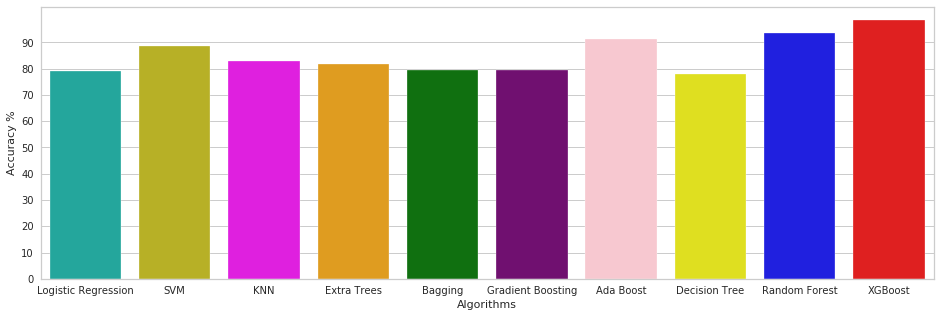

In [479]:
#  Comparing Models
colors = ["#0FBBAE", "#CFC60E", "magenta", "orange","green","purple", "pink", "yellow", "blue", "red"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

#  Predicted Values
y_pred_LR = LR.predict(X_test)
y_pred_SVM = SVM.predict(X_test)
y_pred_KNN = KNN.predict(X_test)
y_pred_ETC = ETC.predict(X_test)
y_pred_BC = BC.predict(X_test)
y_pred_GBC = GBC.predict(X_test)
y_pred_ABC = ABC.predict(X_test)
y_pred_DT = DT.predict(X_test)
y_pred_RF = RF.preict(X_test)
y_pred_XGB = XGB.preict(X_test)


In [480]:
cm_LR = confusion_matrix(y_test,y_pred_LR)
cm_SVM = confusion_matrix(y_test,y_pred_SVM)
cm_KNN = confusion_matrix(y_test,y_pred_KNN)
cm_ETC = confusion_matrix(y_test,y_pred_ETC)
cm_BC = confusion_matrix(y_test,y_pred_BC)
cm_GBC = confusion_matrix(y_test,y_pred_GBC)
cm_ABC = confusion_matrix(y_test,y_pred_ABC)
cm_DT = confusion_matrix(y_test,y_pred_DT)
cm_RF = confusion_matrix(y_test,y_pred_RF)
cm_XGB = confusion_matrix(y_test,y_pred_XGB)

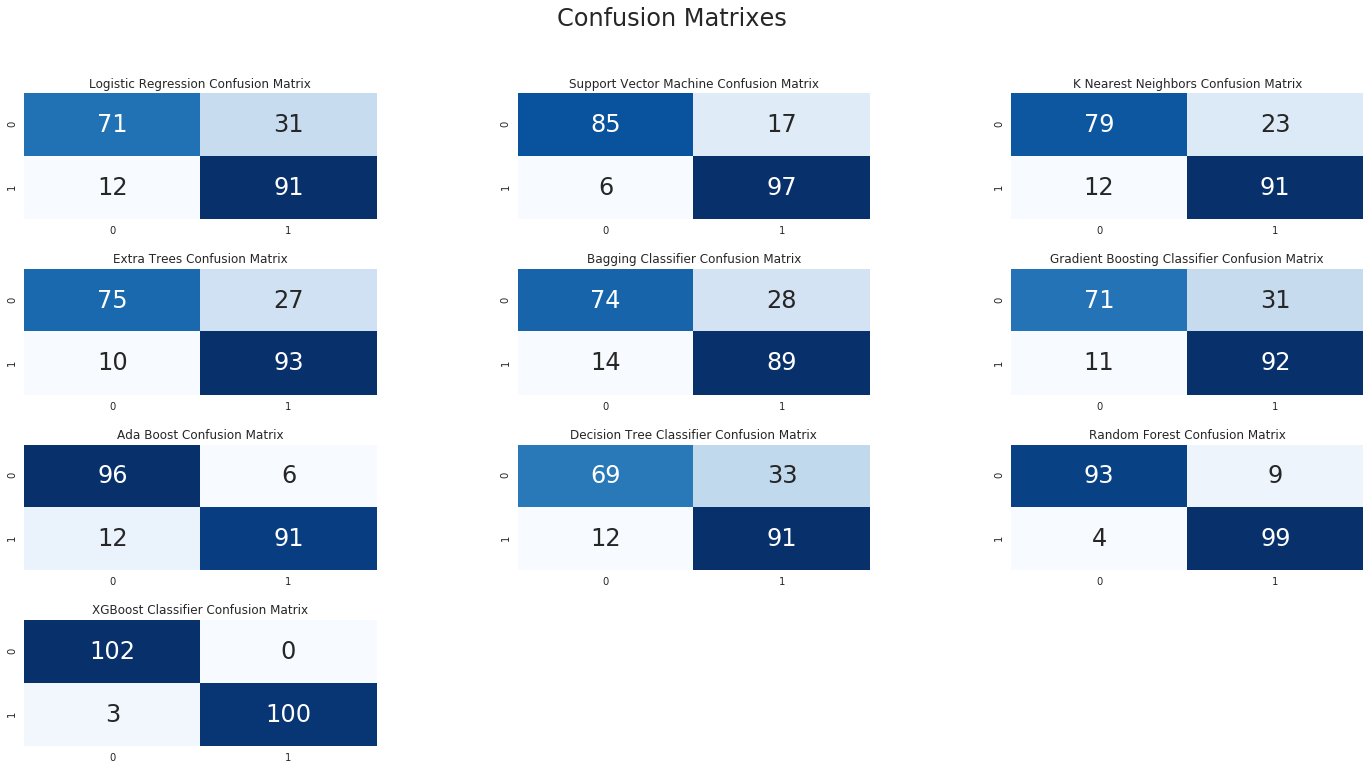

In [481]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(4,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_LR,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,2)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_SVM,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,3)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_KNN,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,4)
plt.title("Extra Trees Confusion Matrix")
sns.heatmap(cm_ETC,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,5)
plt.title("Bagging Classifier Confusion Matrix")
sns.heatmap(cm_BC,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,6)
plt.title("Gradient Boosting Classifier Confusion Matrix")
sns.heatmap(cm_GBC,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,7)
plt.title("Ada Boost Confusion Matrix")
sns.heatmap(cm_ABC,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,8)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_DT,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,9)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_RF,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,10)
plt.title("XGBoost Classifier Confusion Matrix")
sns.heatmap(cm_XGB,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

In [482]:
# Classification Report of Best Classifier
print(classification_report(y_test, y_pred_XGB))
print('\n')

print("  Accuracy: ",metrics.accuracy_score(y_test, y_pred_XGB))
print("  Precision: ",metrics.precision_score(y_test, y_pred_XGB))
print("  Recall: ",metrics.recall_score(y_test, y_pred_XGB))
print("  F1 Score: ",metrics.f1_score(y_test, y_pred_XGB))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



  Accuracy:  0.9853658536585366
  Precision:  1.0
  Recall:  0.970873786407767
  F1 Score:  0.9852216748768473


In [483]:
# Confusion Matrix of Best Classifier
print(confusion_matrix(y_test, y_pred_XGB))

[[102   0]
 [  3 100]]


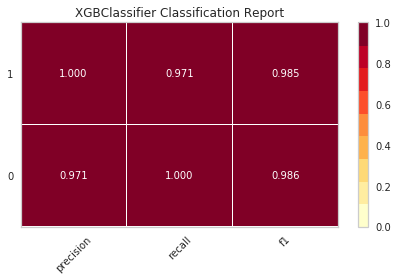

In [484]:
# Visualization of Classification Report of Best Classifier
visualizer = ClassificationReport(XGB)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()